In [1]:
import numpy as np
import os
import glob
import json
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 특정 경로 설정 (예: 'data' 디렉토리)
directory_path = "JSON"

# 특정 경로 하위의 모든 JSON 파일 찾기
json_files = glob.glob(os.path.join(directory_path, '*.json'))

# 모든 JSON 파일의 데이터 불러오기
all_data = []

labels = []

for file_path in json_files:
    with open(file_path, 'r') as file:
        data = json.load(file)
        all_data.append(data)


for idx, fileName in enumerate(json_files):
    splited = fileName.replace("JSON\\", "").split("_")
    if splited[0] not in labels:
        labels.append(splited[0])

All_class_data_list = [[] for _ in range(len(labels))]
y = []

# 불러온 데이터 출력 (또는 다른 처리)
for idx, data in enumerate(all_data):
    print(f"Data from {json_files[idx]}: {data}")
    for j in range(len(labels)):
        if labels[j] in json_files[idx]:
            for d in data:
                All_class_data_list[j].append(d['feature'])
                y.append(j)

print(y)


Data from JSON\BIBI_BadGirl_MFCC_feature.json: [{'time': [10, 20], 'feature': [-107.15461730957031, 11.849685668945312, -33.083560943603516, -13.7149658203125, -24.1431827545166, 0.3267887234687805, -25.66385269165039, -3.9144158363342285, -4.730465412139893, -20.675073623657227, -13.538280487060547, -15.4901704788208, -13.787870407104492, -15.056300163269043, -8.650799751281738, -12.115193367004395, -9.142374992370605, -4.930410385131836, -12.636883735656738, -12.865433692932129]}, {'time': [20, 30], 'feature': [-110.9509048461914, -5.482512950897217, -25.142314910888672, -12.167976379394531, -18.283679962158203, -1.396714448928833, -22.3072452545166, -5.468383312225342, -8.159402847290039, -21.06690788269043, -13.327363967895508, -14.313701629638672, -14.10933780670166, -7.26876974105835, -3.555997610092163, -4.528212070465088, -5.020134925842285, -5.096775531768799, -10.575303077697754, -6.752892017364502]}, {'time': [42, 52], 'feature': [-150.3567352294922, -9.704010963439941, -49.

In [3]:
print(labels)

['BIBI', 'BJJ', 'DGH', 'HYNN', 'IU', 'SKS']


In [4]:
x=[]

for i in range(len(All_class_data_list)):
    for j in range(len(All_class_data_list[i])):
        x.append(All_class_data_list[i][j])

In [5]:
x = np.array(x)

print(x.shape)

(485, 20)


In [6]:
print(len(y))
#확인용

485


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [9]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.979381443298969
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        17
           2       0.92      0.92      0.92        12
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        14
           5       0.94      1.00      0.97        15

    accuracy                           0.98        97
   macro avg       0.98      0.98      0.98        97
weighted avg       0.98      0.98      0.98        97



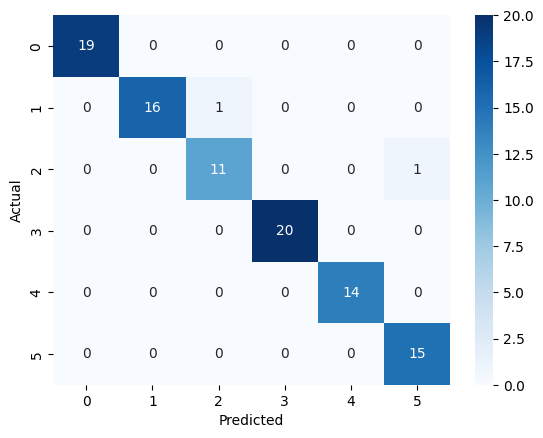

In [10]:
# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
import joblib

joblib_file = "svc_model_Size02_RA20.pkl"
joblib.dump(model, joblib_file)

['svc_model_Size02_RA20.pkl']

In [12]:
probabilities = model.predict_proba(X_test)

In [13]:
# 각 입력 데이터에 대해 클래스별 일치도 % 출력
for i, prob in enumerate(probabilities):
    print(f"입력 데이터 {i+1}:")
    for class_idx, class_prob in enumerate(prob):
        print(f" - 클래스 {class_idx}: {class_prob * 100:.2f}%")

입력 데이터 1:
 - 클래스 0: 0.32%
 - 클래스 1: 1.77%
 - 클래스 2: 0.36%
 - 클래스 3: 0.07%
 - 클래스 4: 0.24%
 - 클래스 5: 97.24%
입력 데이터 2:
 - 클래스 0: 57.81%
 - 클래스 1: 35.85%
 - 클래스 2: 0.76%
 - 클래스 3: 3.11%
 - 클래스 4: 1.13%
 - 클래스 5: 1.34%
입력 데이터 3:
 - 클래스 0: 2.79%
 - 클래스 1: 84.25%
 - 클래스 2: 0.55%
 - 클래스 3: 0.15%
 - 클래스 4: 0.21%
 - 클래스 5: 12.04%
입력 데이터 4:
 - 클래스 0: 3.93%
 - 클래스 1: 10.62%
 - 클래스 2: 6.83%
 - 클래스 3: 0.87%
 - 클래스 4: 1.90%
 - 클래스 5: 75.86%
입력 데이터 5:
 - 클래스 0: 0.10%
 - 클래스 1: 0.50%
 - 클래스 2: 6.30%
 - 클래스 3: 0.34%
 - 클래스 4: 0.07%
 - 클래스 5: 92.68%
입력 데이터 6:
 - 클래스 0: 6.26%
 - 클래스 1: 2.56%
 - 클래스 2: 80.88%
 - 클래스 3: 1.33%
 - 클래스 4: 6.04%
 - 클래스 5: 2.93%
입력 데이터 7:
 - 클래스 0: 0.19%
 - 클래스 1: 1.11%
 - 클래스 2: 0.15%
 - 클래스 3: 96.63%
 - 클래스 4: 0.84%
 - 클래스 5: 1.09%
입력 데이터 8:
 - 클래스 0: 5.19%
 - 클래스 1: 5.12%
 - 클래스 2: 5.17%
 - 클래스 3: 4.46%
 - 클래스 4: 78.86%
 - 클래스 5: 1.20%
입력 데이터 9:
 - 클래스 0: 95.25%
 - 클래스 1: 0.21%
 - 클래스 2: 0.19%
 - 클래스 3: 1.80%
 - 클래스 4: 2.12%
 - 클래스 5: 0.43%
입력 데이터 10:
 - 클래스 0: 1.53%
 - 클래스 

In [43]:
import joblib
import numpy as np

# 저장된 모델 로드
joblib_file = "svc_model_Size02_RA20.pkl"
loaded_model = joblib.load(joblib_file)

file_path = "JSON\BJJ_ToTheRain_MFCC_feature.json"

with open(file_path, 'r') as file:
        new_data = json.load(file)

new_feature = []

for data in new_data:
        new_feature.append(data['feature'])

probabilities = loaded_model.predict_proba(new_feature)

prdic_percent = [ 0 ] * probabilities.shape[1]

cnt =0

for i, prob in enumerate(probabilities):
    print(f"입력 데이터 {i+1}:")
    cnt += 1
    for class_idx, class_prob in enumerate(prob):
        print(f" - 클래스 {class_idx}: {class_prob * 100:.2f}%")
        prdic_percent[class_idx] += class_prob



입력 데이터 1:
 - 클래스 0: 0.35%
 - 클래스 1: 63.02%
 - 클래스 2: 27.95%
 - 클래스 3: 1.42%
 - 클래스 4: 0.86%
 - 클래스 5: 6.40%
입력 데이터 2:
 - 클래스 0: 1.11%
 - 클래스 1: 42.39%
 - 클래스 2: 55.00%
 - 클래스 3: 0.95%
 - 클래스 4: 0.21%
 - 클래스 5: 0.34%
입력 데이터 3:
 - 클래스 0: 0.26%
 - 클래스 1: 76.59%
 - 클래스 2: 19.69%
 - 클래스 3: 0.24%
 - 클래스 4: 0.11%
 - 클래스 5: 3.11%
입력 데이터 4:
 - 클래스 0: 0.17%
 - 클래스 1: 89.01%
 - 클래스 2: 10.23%
 - 클래스 3: 0.06%
 - 클래스 4: 0.03%
 - 클래스 5: 0.50%
입력 데이터 5:
 - 클래스 0: 0.74%
 - 클래스 1: 74.76%
 - 클래스 2: 20.55%
 - 클래스 3: 2.37%
 - 클래스 4: 1.37%
 - 클래스 5: 0.21%


In [44]:
print("입력 데이터 예측")
for i, prob in enumerate(prdic_percent):
    print(f"class {i} : {prob/cnt}")

입력 데이터 예측
class 0 : 0.005246552831695313
class 1 : 0.6915626880828719
class 2 : 0.26682637539690834
class 3 : 0.010075056961972136
class 4 : 0.005147772498792903
class 5 : 0.021141554227759325


In [15]:
scores = cross_val_score(model, x, y, cv=65)
print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Cross-Validation Accuracy: {scores.mean()}')

Cross-Validation Accuracy Scores: [1.         1.         0.875      0.875      1.         1.
 1.         0.875      1.         0.875      0.75       0.75
 0.875      1.         0.875      0.875      1.         0.875
 0.875      1.         0.875      1.         1.         0.875
 1.         1.         0.875      1.         0.875      1.
 0.85714286 1.         1.         0.85714286 1.         1.
 1.         1.         1.         0.85714286 1.         0.85714286
 0.71428571 0.85714286 0.85714286 0.85714286 0.71428571 0.85714286
 1.         1.         1.         0.85714286 1.         1.
 0.85714286 1.         1.         1.         1.         0.71428571
 1.         1.         1.         0.71428571 0.71428571]
Mean Cross-Validation Accuracy: 0.9233516483516483


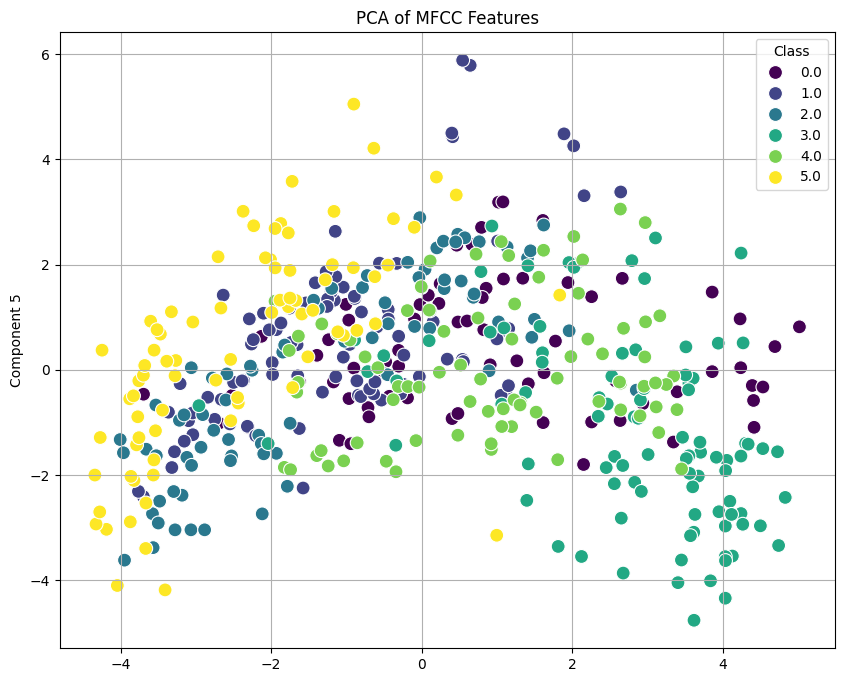

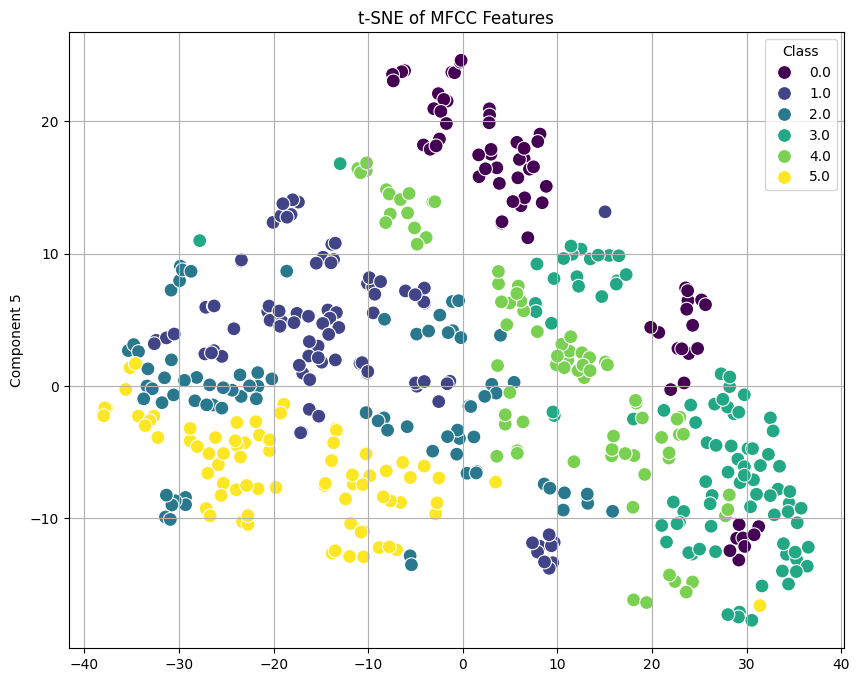

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 데이터 예제 (각 클래스별로 20개의 특징을 갖는 MFCC 데이터)
# 실제 데이터로 대체하세요
np.random.seed(42)
class_1 = np.array(All_class_data_list[0])
class_2 = np.array(All_class_data_list[1])
class_3 = np.array(All_class_data_list[2])
class_4 = np.array(All_class_data_list[3])
class_5 = np.array(All_class_data_list[4])
class_6 = np.array(All_class_data_list[5])

# 레이블 생성
labels_1 = np.zeros(class_1.shape[0])
labels_2 = np.ones(class_2.shape[0])
labels_3 = np.array([2]*class_3.shape[0])
labels_4 = np.array([3]*class_4.shape[0])
labels_5 = np.array([4]*class_5.shape[0])
labels_6 = np.array([5]*class_6.shape[0])

# 데이터 합치기
X = np.vstack((class_1, class_2, class_3, class_4, class_5, class_6))
y = np.hstack((labels_1, labels_2, labels_3, labels_4, labels_5, labels_6))

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE 차원 축소
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 시각화 함수
def plot_embedding(X, y, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=100)
    plt.title(title)
    plt.ylabel('Component 5')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()

# PCA 시각화
plot_embedding(X_pca, y, 'PCA of MFCC Features')

# t-SNE 시각화
plot_embedding(X_tsne, y, 't-SNE of MFCC Features')


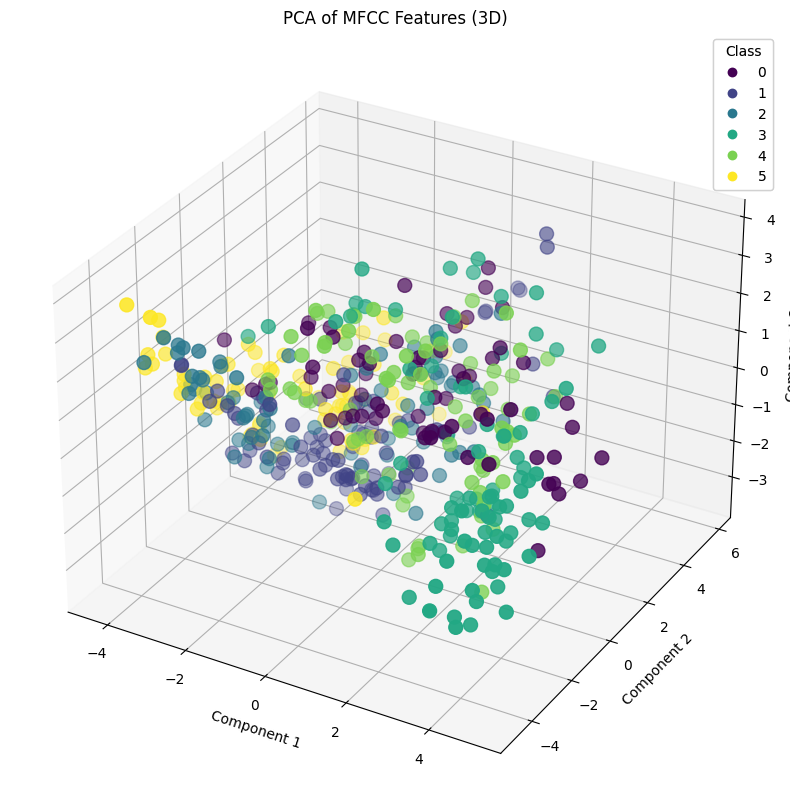

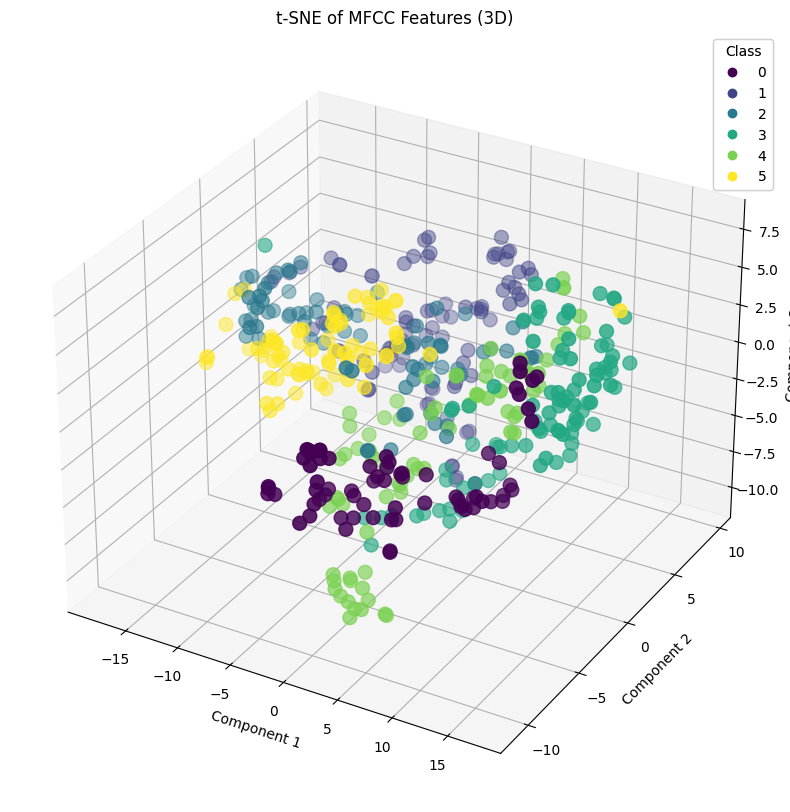

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 데이터 예제 (각 클래스별로 20개의 특징을 갖는 MFCC 데이터)
# 실제 데이터로 대체하세요
np.random.seed(42)
class_1 = np.array(All_class_data_list[0])
class_2 = np.array(All_class_data_list[1])
class_3 = np.array(All_class_data_list[2])
class_4 = np.array(All_class_data_list[3])
class_5 = np.array(All_class_data_list[4])
class_6 = np.array(All_class_data_list[5])

# 레이블 생성
labels_1 = np.zeros(class_1.shape[0])
labels_2 = np.ones(class_2.shape[0])
labels_3 = np.array([2]*class_3.shape[0])
labels_4 = np.array([3]*class_4.shape[0])
labels_5 = np.array([4]*class_5.shape[0])
labels_6 = np.array([5]*class_6.shape[0])

# 데이터 합치기
X = np.vstack((class_1, class_2, class_3, class_4, class_5, class_6))
y = np.hstack((labels_1, labels_2, labels_3, labels_4, labels_5, labels_6))

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 차원 축소
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# t-SNE 차원 축소
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 3D 시각화 함수
def plot_3d_embedding(X, y, title):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=100)
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    legend1 = ax.legend(*scatter.legend_elements(), title="Class")
    ax.add_artist(legend1)
    plt.show()

# PCA 시각화
plot_3d_embedding(X_pca, y, 'PCA of MFCC Features (3D)')

# t-SNE 시각화
plot_3d_embedding(X_tsne, y, 't-SNE of MFCC Features (3D)')


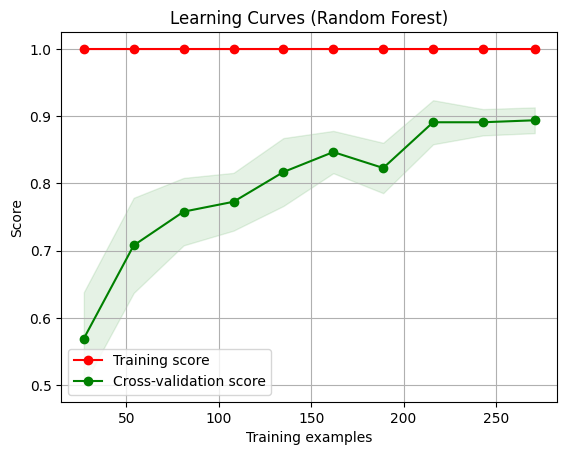

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# 훈련 데이터와 검증 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

# 모델 생성
model = RandomForestClassifier(random_state=42)

# 학습 곡선 계산
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# 학습 곡선 평균과 표준편차 계산
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 학습 곡선 그리기
plt.figure()
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# 훈련 점수 그리기
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# 검증 점수 그리기
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


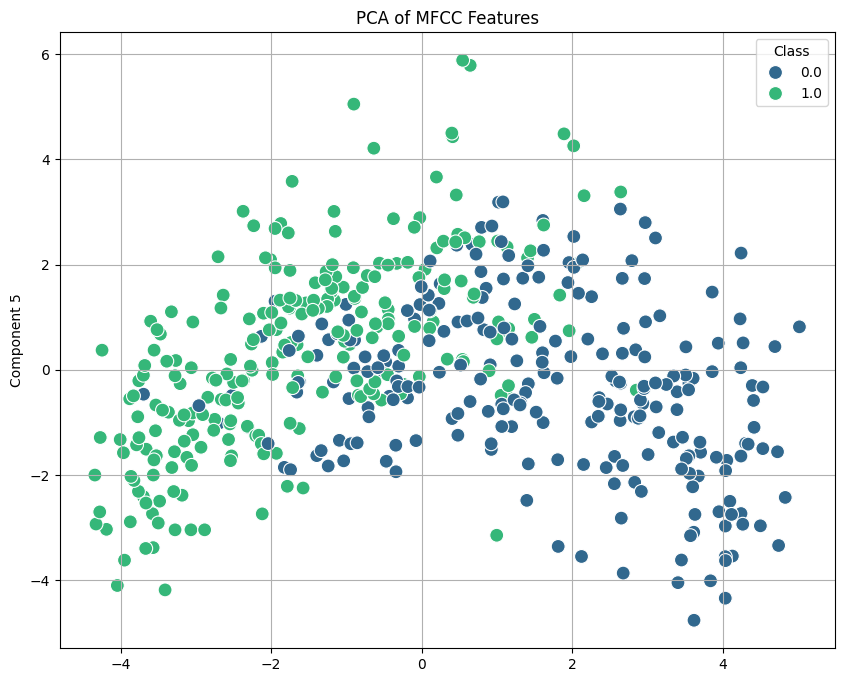

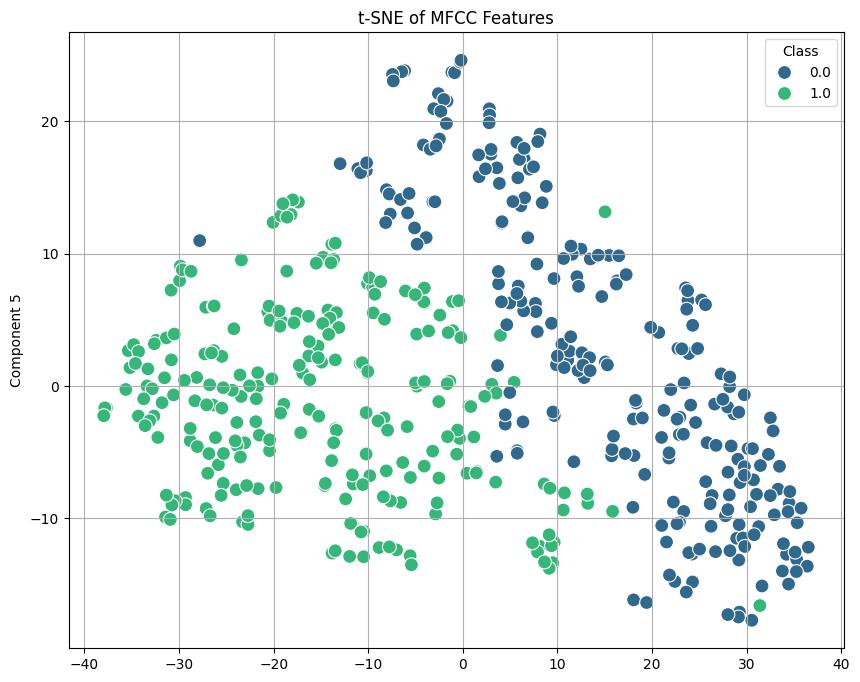

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 데이터 예제 (각 클래스별로 20개의 특징을 갖는 MFCC 데이터)
# 실제 데이터로 대체하세요
np.random.seed(42)
class_1 = np.array(All_class_data_list[0])
class_2 = np.array(All_class_data_list[1])
class_3 = np.array(All_class_data_list[2])
class_4 = np.array(All_class_data_list[3])
class_5 = np.array(All_class_data_list[4])
class_6 = np.array(All_class_data_list[5])

# 레이블 생성
# 0: Girl, 1:Boy
labels_1 = np.zeros(class_1.shape[0])
labels_2 = np.ones(class_2.shape[0])
labels_3 = np.ones(class_3.shape[0])
labels_4 = np.zeros(class_4.shape[0])
labels_5 = np.zeros(class_5.shape[0])
labels_6 = np.ones(class_6.shape[0])

# 데이터 합치기
X = np.vstack((class_1, class_2, class_3, class_4, class_5, class_6))
y = np.hstack((labels_1, labels_2, labels_3, labels_4, labels_5, labels_6))

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE 차원 축소
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 시각화 함수
def plot_embedding(X, y, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=100)
    plt.title(title)
    plt.ylabel('Component 5')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()

# PCA 시각화
plot_embedding(X_pca, y, 'PCA of MFCC Features')

# t-SNE 시각화
plot_embedding(X_tsne, y, 't-SNE of MFCC Features')
